<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Supervised_Learning_Elvis_IP%2C_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERVISED LEARNING**

**Mchezopesa LTD Analysis**

# 1.1 *Defining the Question*

Football is the most popular sport in the world having over 1.5 billion viewers worldwide. The most popular tournament is the FIFA World Cup which takes place after four years on a rotational basis across all continents. The international teams are ranked using the results of FIFA recognized international matches. Brazil is currently the longest holder of the first position. The rankings also help betting firms and football analyst firms such as Mchezopesa Ltd. However, it can be a nightmare for the firms to solely rely on the FIFA rankings forcing them to adapt statistical approaches to try and predict a football’s match outcome based on a team’s recent results. 

# 1.2  Defining the Metrics of Success

Successfully performing Exploratory Data Analysis, Univariate, Bivariate Analysis,Create Visualizations, employing two approaches: Polynomial and Logistical approaches and Challenging the solution.

# 1.3 Understanding the context

It is estimated that in the 2019/2020 season, the football industry generated over 25.2 $billion. Betting firms are estimated to have interacted with over 1 billion euros in the United Kingdom. This draws attention to the use of statistical data to predict the outcome of the matches with the main objective of avoiding losses. 

# 1.4 Recording the Experimental Design

The data will be ran through an EDA analysis after having been subjected to cleaning, Polynomial analyis an Logistical analyis 

Data Relevance 
The data was collected from trusted Fifa sources and validated by https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc above link.

# Importing the libraries needed

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

# 2.1 Loading the Datasets

In [19]:
#Loading the fifa_ranking datasets
fifa_ranking = pd.read_csv('fifa_ranking.csv')
fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [ ]:
fifa_ranking.shape

(57793, 16)

The fifa ranking dataset has 57793 rows and 16 columns

In [18]:
#importing the results dataset
results = pd.read_csv('results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [ ]:
results.shape

(40839, 9)

The results dataset has 40839 rows and 9 columns

In [ ]:
#Getting more information on the datasets
fifa_ranking.info

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

In [ ]:
#results info
results.info

<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [ ]:
# identify the column names in our dataset
fifa_ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

The above are variables to the fifa_ranking dataset

In [ ]:
#identify the column in our results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The above are variables of the results dataset

In [ ]:
#identifying missing values in the datasets
# Identify any missing values in the fifa dataset
fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

Their no missing values in the Fifa ranking dataset

In [ ]:
#identifying missing values in the results dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Their are no missing values in the dataset

In [ ]:
#Checking if the datasets have the right datatype
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [ ]:
#Results
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [ ]:
#checking for unique values in the datasets
fifa_ranking.nunique()

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [ ]:
results.nunique()

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64

In [ ]:
# Check for duplicate values in the fifa ranking dataset
fifa_ranking.duplicated().sum()

37

In [ ]:
#checking for duplicate in the results dataset
results.duplicated().sum()

0

In [ ]:
#details of the datasets
fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


3.1 **Tidying the datasets**

In [20]:
#removing the duplicates from the fifa dataset
fifa_ranking.drop_duplicates(subset=None, keep='first', inplace= False)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


The number of rows has significantly reduced

# 2.2 Tydying the Dataset

In [21]:
#checking for any anomalies of the results dataset
col = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral']
for i in col:

  u = results[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  date is ['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']
Unique values of  home_team is ['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece' 'Curaçao'
 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname' 'French Guiana'
 'Cuba' 'Colombia' 'Ecuador' 'Sa

In [22]:
# Drop columns that we will not use in our analysis
fifa_ranking.drop(['country_abrv','cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],axis=1, inplace=True)
# Confirm changes
fifa_ranking.head(2)


,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,confederation,rank_date
0,1,Germany,0.0,57,0,0.0,UEFA,1993-08-08
1,2,Italy,0.0,57,0,0.0,UEFA,1993-08-08


In [23]:
# Drop columns that we will not use in our analysis
results.drop(['neutral'],axis=1, inplace=True)
# Confirm changes
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England


We have dropped the columns from the fifa and resuslts datasets to enbale us to merge them into one.

In [24]:
#Renaming some column names in the fifa dataset
fifa_ranking  = fifa_ranking.rename(columns={"country_full":"country"})
print(fifa_ranking.head(2))

   rank  country  total_points  ...  cur_year_avg  confederation   rank_date
0     1  Germany           0.0  ...           0.0           UEFA  1993-08-08
1     2    Italy           0.0  ...           0.0           UEFA  1993-08-08

[2 rows x 8 columns]


In [25]:
##Merging the datasets using the rank and the country columns of the home team
home_df = pd.merge(results, fifa_ranking, how = 'inner', left_on =['date','home_team'], right_on = ['rank_date','country'])
home_df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,rank,country_y,total_points,previous_points,rank_change,cur_year_avg,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,59,Bolivia,0.0,13,28,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,8,Brazil,0.0,55,-5,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,35,Ecuador,0.0,23,30,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,65,Guinea,0.0,23,-2,0.0,CAF,1993-08-08


In [26]:
##Merging the datasets using the country and the away team ranks.
away_df = pd.merge(results, fifa_ranking, how = 'inner', left_on =['date','away_team'], right_on = ['rank_date','country'])
away_df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country_x,rank,country_y,total_points,previous_points,rank_change,cur_year_avg,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,22,Uruguay,0.0,47,-6,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,14,Mexico,0.0,42,11,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,94,Venezuela,0.0,4,31,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,86,Sierra Leone,0.0,16,-7,0.0,CAF,1993-08-08


In [27]:
#Merging both the away and home dataframes to create one dataframe

pred_df = pd.merge(home_df, away_df, how = 'inner', left_on =['date','home_team','away_team','home_score','away_score'], right_on = ['date','home_team','away_team','home_score','away_score'])
pred_df.head(4)

,date,home_team,away_team,home_score,away_score,tournament_x,city_x,country_x_x,rank_x,country_y_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,confederation_x,rank_date_x,tournament_y,city_y,country_x_y,rank_y,country_y_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,59,Bolivia,0.0,13,28,0.0,CONMEBOL,1993-08-08,FIFA World Cup qualification,La Paz,Bolivia,22,Uruguay,0.0,47,-6,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,8,Brazil,0.0,55,-5,0.0,CONMEBOL,1993-08-08,Friendly,Maceió,Brazil,14,Mexico,0.0,42,11,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,35,Ecuador,0.0,23,30,0.0,CONMEBOL,1993-08-08,FIFA World Cup qualification,Quito,Ecuador,94,Venezuela,0.0,4,31,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,65,Guinea,0.0,23,-2,0.0,CAF,1993-08-08,Friendly,Conakry,Guinea,86,Sierra Leone,0.0,16,-7,0.0,CAF,1993-08-08


In [28]:
# Drop columns that we will not use in our analysis
#
pred_df.drop(['tournament_x','city_x','country_x_x','country_y_x','rank_change_x','total_points_x','total_points_y','rank_change_y','country_x_y','country_y_y','cur_year_avg_x','rank_date_x','cur_year_avg_y','confederation_y','rank_date_y','previous_points_x','previous_points_y'],axis=1, inplace=True)
# Confirm changes
pred_df.head(2)

,date,home_team,away_team,home_score,away_score,rank_x,confederation_x,tournament_y,city_y,rank_y
0,1993-08-08,Bolivia,Uruguay,3,1,59,CONMEBOL,FIFA World Cup qualification,La Paz,22
1,1993-08-08,Brazil,Mexico,1,1,8,CONMEBOL,Friendly,Maceió,14


In [ ]:
#identify the column in our results dataset
pred_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score', 'rank_x',
       'confederation_x', 'tournament_y', 'city_y', 'rank_y'],
      dtype='object')

In [ ]:
pred_df.dtypes

date               object
home_team          object
away_team          object
home_score          int64
away_score          int64
rank_x              int64
confederation_x    object
tournament_y       object
city_y             object
rank_y              int64
dtype: object

In [29]:
#Creating a new status column on the Fulltime results
def my_function(x):
  if x['home_score'] == x['away_score']:
    status = 'Draw'
  elif x['home_score'] > x['away_score']:
      status = 'win'
  else:
        status = 'loss'
  return status

pred_df['status'] = pred_df.apply(my_function, axis=1)
pred_df.head()


,date,home_team,away_team,home_score,away_score,rank_x,confederation_x,tournament_y,city_y,rank_y,status
0,1993-08-08,Bolivia,Uruguay,3,1,59,CONMEBOL,FIFA World Cup qualification,La Paz,22,win
1,1993-08-08,Brazil,Mexico,1,1,8,CONMEBOL,Friendly,Maceió,14,Draw
2,1993-08-08,Ecuador,Venezuela,5,0,35,CONMEBOL,FIFA World Cup qualification,Quito,94,win
3,1993-08-08,Guinea,Sierra Leone,1,0,65,CAF,Friendly,Conakry,86,win
4,1993-08-08,Paraguay,Argentina,1,3,67,CONMEBOL,FIFA World Cup qualification,Asunción,5,loss


In [30]:
#Renaming some column names in the fifa dataset
pred_df  = pred_df.rename(columns={"country_full":"country","rank_x":"home_team_rank","confederation_x":"confederation","tournament_y":"tournament","city_y":"city","rank_y":"away_team_rank"})
print(pred_df.head(2))


         date home_team away_team  ...    city  away_team_rank  status
0  1993-08-08   Bolivia   Uruguay  ...  La Paz              22     win
1  1993-08-08    Brazil    Mexico  ...  Maceió              14    Draw

[2 rows x 11 columns]


In [14]:
# Check for duplicate values in the merged  dataset
pred_df.duplicated().sum()

0

Their no dulicates in the new merged dataset

In [ ]:
#identifying missing values in the results dataset
pred_df.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
home_team_rank    0
confederation     0
tournament        0
city              0
away_team_rank    0
status            0
dtype: int64

Their no null values in the new dataset

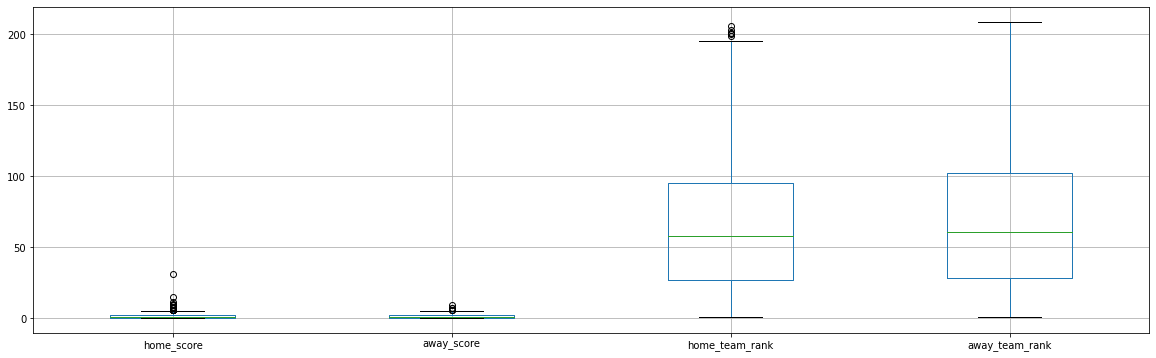

In [31]:
#checking for outliers
pred_dff= pred_df
plt.figure(figsize = (20, 6))
pred_df.boxplot()
plt.show()

i choose to retain the outliers to help preserve data validity during statistical analysis.

In [32]:
#converting some categoerical values in the columns to numerical form
from sklearn.preprocessing import LabelEncoder
#Converting confideration, home team, away team, tournament, city and country
print(pred_df["confederation"].unique())
print(pred_df['home_team'].unique())
print(pred_df['away_team'].unique())
print(pred_df['tournament'].unique())
print(pred_df['city'].unique())
print(pred_df['status'].unique())

['CONMEBOL' 'CAF' 'AFC' 'UEFA' 'OFC' 'CONCACAF']
['Bolivia' 'Brazil' 'Ecuador' 'Guinea' 'Paraguay' 'Peru' 'Saudi Arabia'
 'Israel' 'England' 'Poland' 'Oman' 'Iraq' 'Fiji' 'Angola' 'Burkina Faso'
 'Greece' 'Sierra Leone' 'South Africa' 'France' 'Portugal' 'Argentina'
 'Belgium' 'Colombia' 'Czech Republic' 'Denmark' 'Estonia' 'Hungary'
 'Jamaica' 'Netherlands' 'Northern Ireland' 'Norway' 'Romania' 'Slovakia'
 'Switzerland' 'Venezuela' 'Honduras' 'Russia' 'El Salvador' 'Syria'
 'Mexico' 'Malta' 'New Zealand' 'Belarus' 'Bosnia and Herzegovina'
 'Bulgaria' 'Finland' 'Republic of Ireland' 'Liechtenstein' 'Turkey'
 'Ukraine' 'Uruguay' 'Kuwait' 'Senegal' 'Spain' 'Chile' 'Croatia'
 'Germany' 'Italy' 'Scotland' 'Slovenia' 'Sweden' 'Austria' 'Cyprus'
 'Iceland' 'Lithuania' 'Qatar' 'United Arab Emirates' 'Sudan' 'Albania'
 'Egypt' 'Georgia' 'Guatemala' 'Luxembourg' 'San Marino' 'Costa Rica'
 'Thailand' 'Faroe Islands' 'Uzbekistan' 'Tunisia' 'Panama' 'Togo' 'Macau'
 'Japan' 'Jordan' 'Maldives' 'Aze

# 3. Exploratory  Data Analysis

# 3.1 Univariate Analysis 

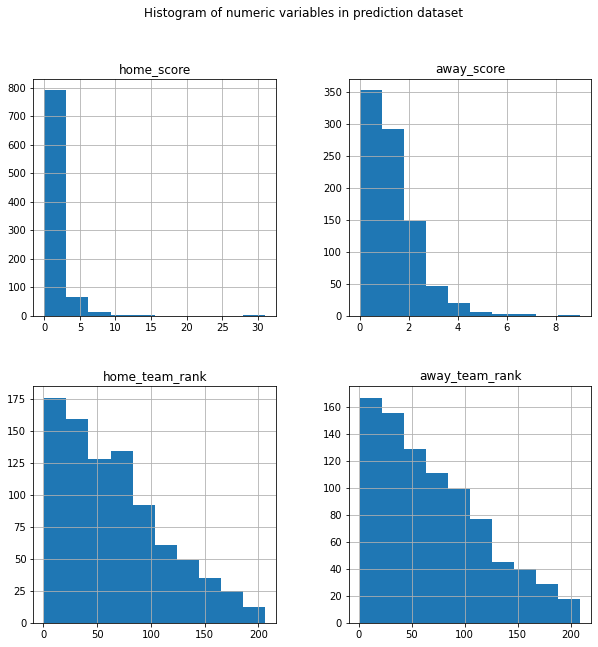

In [33]:
# Plotting our numerical variables on histogram to assess the relationship
pred_df.drop(['confederation', 'date', 'home_team', 'away_team','tournament', 'city'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables in prediction dataset")
plt.savefig('Prediction access Histogram')
plt.show()

The ranks, home score and away score data is positively skewed.

In [ ]:
# Frequency Table of the Number of home teams
pred_df.home_team.value_counts()

Mexico          23
Estonia         15
Saudi Arabia    15
Portugal        15
Greece          14
                ..
Haiti            1
Canada           1
Indonesia        1
Palestine        1
Grenada          1
Name: home_team, Length: 160, dtype: int64

Mexico is the most common home team

In [ ]:
# Frequency Table of the Number of home teams
pred_df.away_team.value_counts()

Uruguay                     15
Argentina                   15
Kuwait                      14
Israel                      13
Bulgaria                    13
                            ..
Eritrea                      1
Tajikistan                   1
Turks and Caicos Islands     1
Sierra Leone                 1
Mongolia                     1
Name: away_team, Length: 159, dtype: int64

  Uruguay is the most common away team

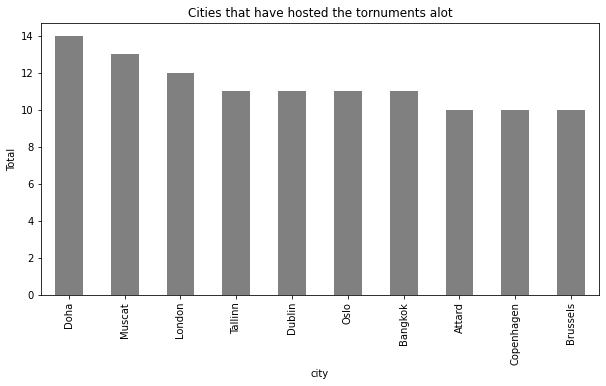

In [ ]:
#Bar graph of cities that have hosted the tournaments alot
plt.figure(figsize = (10,5))
pred_df.groupby('city').size().sort_values(ascending = False)[:10].plot(kind='bar', color='grey')
plt.title('Cities that have hosted the tornuments alot')
plt.ylabel('Total')
plt.xlabel('city')
plt.show()

Kualar Lumpar has hosted many footbal tornaments than any other city

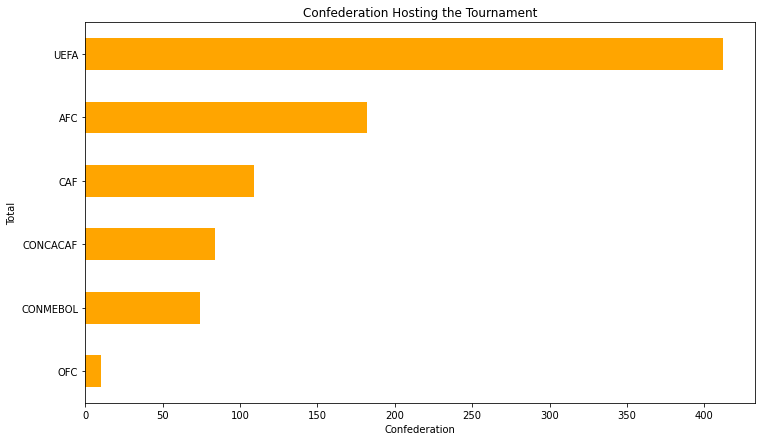

In [ ]:
# Bar chart showing the different types of tournaments the countries participate in.
plt.figure(figsize = (12,7))
pred_df.groupby('confederation').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('Confederation Hosting the Tournament')
plt.ylabel('Total')
plt.xlabel('Confederation')
plt.show()

UEFA is the most popular football body hosting many tournaments

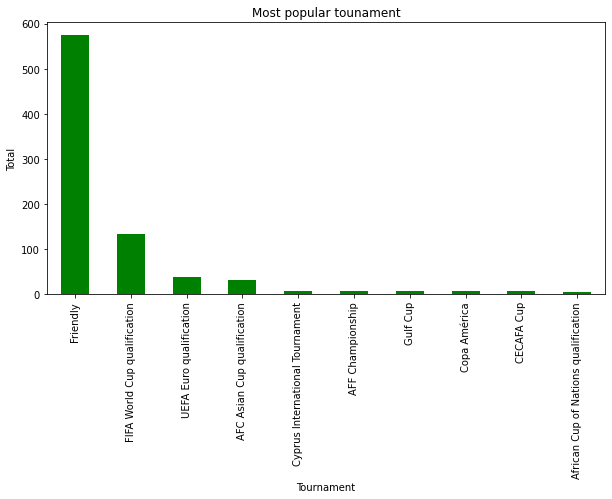

In [ ]:
#Bar graph of the most popular tounament
plt.figure(figsize = (10,5))
pred_df.groupby('tournament').size().sort_values(ascending = False)[:10].plot(kind='bar', color='green')
plt.title('Most popular tounament')
plt.ylabel('Total')
plt.xlabel('Tournament')
plt.show()

Country friendlies happen to be the most preferred international football tournament.Their is a huge gap to be explored as seen by the huge difference between friendly matches and other tournaments

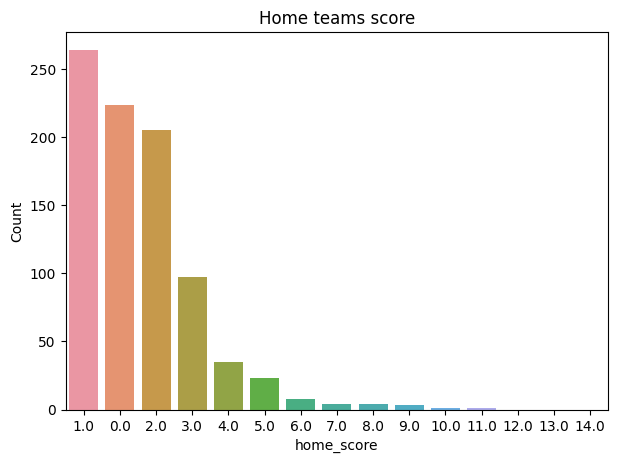

In [ ]:
#Countplot showing the outcome of the goals scored by home teams
plt.figure(figsize = (7, 5), dpi=100)
sns.countplot(pred_df['home_score'], order=pred_df['home_score'].value_counts().index[:15])
plt.title('Home teams score')
plt.ylabel('Count')
plt.show()

Most of the home team scores ended with a one goal outcome

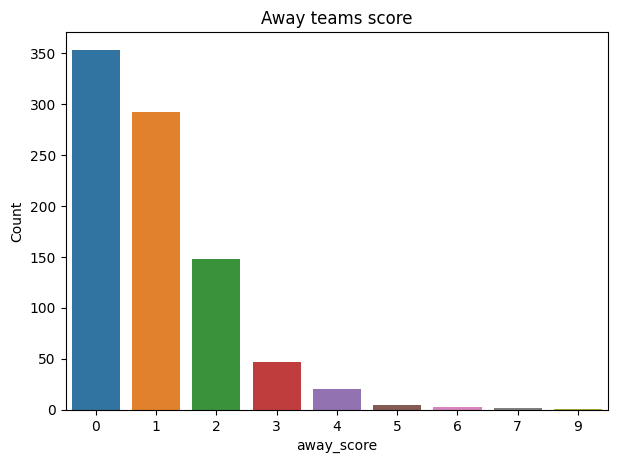

In [ ]:
#Countplot showing the outcome of the goals scored by away teams
plt.figure(figsize = (7, 5), dpi=100)
sns.countplot(pred_df['away_score'], order=pred_df['away_score'].value_counts().index[:15])
plt.title('Away teams score')
plt.ylabel('Count')
plt.show()

Most of the away teams had a draw of (0) goals as an outcome

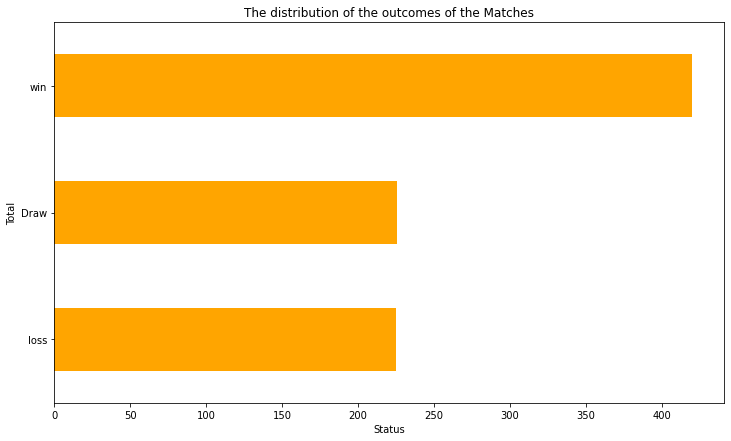

In [ ]:
# Bar chart showing the different types of tournaments the countries participate in.
plt.figure(figsize = (12,7))
pred_df.groupby('status').size().sort_values(ascending = True).plot(kind='barh', color='orange')
plt.title('The distribution of the outcomes of the Matches')
plt.ylabel('Total')
plt.xlabel('Status')
plt.show()

We have more wins as a football outcome

In [ ]:
pred_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'confederation', 'tournament', 'city',
       'away_team_rank', 'status'],
      dtype='object')

In [34]:
# We will define the numerical columns as colls to help with analysis
colls = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'confederation', 'tournament', 'city',
       'away_team_rank', 'status']
# Finding the mean of numerical columns
pred_df[colls].mean()

home_score         1.632606
away_score         1.004592
home_team_rank    65.549943
away_team_rank    69.918485
dtype: float64

In [ ]:
# Finding the median of numerical columns
pred_df[colls].median()

home_score         1.0
away_score         1.0
home_team_rank    58.0
away_team_rank    61.0
dtype: float64

In [ ]:
# Finding the median of numerical columns
pred_df[colls].median()

home_score         1.0
away_score         1.0
home_team_rank    58.0
away_team_rank    61.0
dtype: float64

In [ ]:
# Standard Deviation of numerical columns
pred_df[colls].std()

home_score         1.905960
away_score         1.154691
home_team_rank    47.557993
away_team_rank    50.497652
dtype: float64

In [ ]:
# Variance of numerical columns
pred_df[colls].var()

home_score           3.632683
away_score           1.333312
home_team_rank    2261.762733
away_team_rank    2550.012888
dtype: float64

In [ ]:
# Skewness of numerical columns
pred_df[colls].skew()

home_score        5.524378
away_score        1.746569
home_team_rank    0.753087
away_team_rank    0.666945
dtype: float64

The data is positively skewed

In [ ]:
# The Kurtosis of numerical columns
pred_df[colls].kurt()

home_score        68.557865
away_score         5.240328
home_team_rank    -0.148830
away_team_rank    -0.361778
dtype: float64

The home and away score has extreme values

**Recommendations**

1. Their is a sizable difference between friendly matches and other football organizaed tournaments. The football federations should take it as an opportunity and explore the gap.
2. Africa and North American cities are not featured in the top cities hosting the tournamanets, it is therefore advisable that the FIFA governing body assess why their federations rank low in organizing matches.
3. The home teams were in a better position to score and win the game

# 3.2 **Bivarite Analysis**

In [ ]:
pred_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'confederation', 'tournament', 'city',
       'away_team_rank', 'status'],
      dtype='object')

<Figure size 700x500 with 0 Axes>

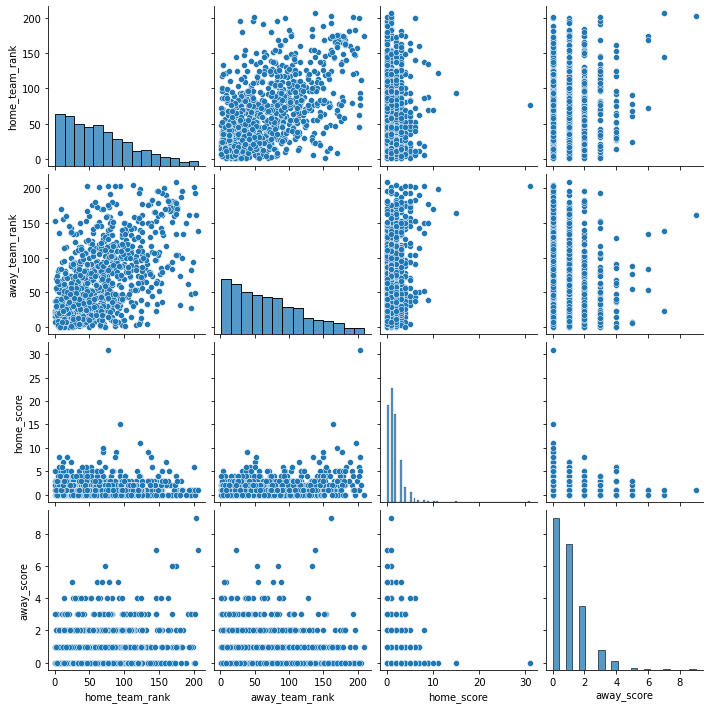

In [ ]:
#Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
y =['date','home_team_rank','away_team_rank','home_score', 'away_score']
sns.pairplot(pred_df[y])

The graphs represents different relationships between various variables. Most of the data ploted against home and away score was positively skewed.

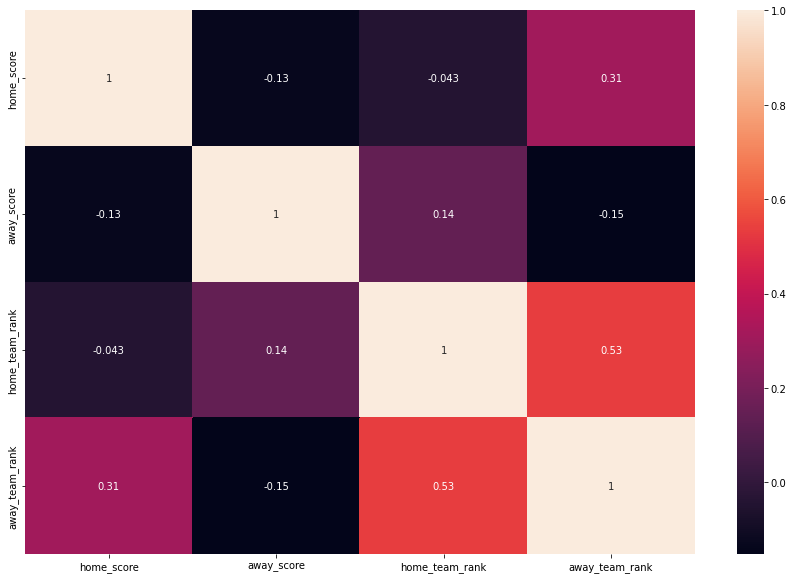

In [35]:
#A correlation matrix of the numerical values above for statistical clarity
corr = pred_df[colls].corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True)

Their is a notable negative correlation between some variables such as:away score and away team rank , home score and away score. The highest positive correlation is 0.53 between home team rank and away team rank.

# 3.3 **Multivariate Analyises**

Since it is under supervised learning, we use the reduction technique

In [36]:
#Importing the libraries needed for multivariate analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [37]:
#Creating a column that sums the number of total scored
pred_df['total_scores'] = pred_df['home_score'] + pred_df['away_score']
pred_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'confederation', 'tournament', 'city',
       'away_team_rank', 'status', 'total_scores'],
      dtype='object')

In [38]:
#These are the columns that we will use for the analysis
dfc = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'confederation', 'tournament', 'city',
       'away_team_rank', 'status','total_scores']

We define the columns we will subject under LDA reduction technique

In [39]:
#Encoding the multiple columns at ago
pred_dff = pred_df[dfc].apply(LabelEncoder().fit_transform)
pred_dff.head()

,date,home_team,away_team,home_score,away_score,home_team_rank,confederation,tournament,city,away_team_rank,status,total_scores
0,0,20,150,3,1,58,3,16,169,21,2,4
1,0,23,90,1,1,7,3,17,196,13,0,2
2,0,40,153,5,0,34,3,16,289,93,2,5
3,0,59,125,1,0,64,1,17,78,85,2,1
4,0,111,7,1,3,66,3,16,21,4,1,4


In [40]:
#view the shape of the dataframe
pred_dff.shape

(871, 12)

In [41]:
#Step 1: Seperating my target label (diagnosis) from other features
X = pred_dff.drop(['status'], axis = 1)
Y = pred_dff['status']

In [42]:
#Step 2: Confirming the features don't contain the target variable
X[1:12]

,date,home_team,away_team,home_score,away_score,home_team_rank,confederation,tournament,city,away_team_rank,total_scores
1,0,23,90,1,1,7,3,17,196,13,2
2,0,40,153,5,0,34,3,16,289,93,5
3,0,59,125,1,0,64,1,17,78,85,1
4,0,111,7,1,3,66,3,16,21,4,4
5,0,112,32,0,1,69,3,16,180,18,1
6,1,123,35,1,2,43,0,17,154,37,3
7,2,69,148,1,0,53,5,17,123,89,1
8,3,43,57,5,0,14,5,17,189,31,5
9,3,114,10,3,4,26,5,17,148,40,7
10,4,106,123,2,1,64,0,17,234,52,3


In [43]:
#Checking the unique values of the target variable
Y.unique()

array([2, 0, 1])

In [44]:
#Step 3: Create an instance of LDA and train the model
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,Y)
lda_feat = X_lda.transform(X)

#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 0.0524753 ,  0.05273653,  0.04764147,  0.23564089,  0.78193966,
         0.03298146,  1.10105698,  0.5388665 ,  0.01702238,  0.01820082,
         0.30848722],
       [ 0.05464393,  0.05664546,  0.04591119, -0.48938486,  2.74024984,
         0.04106213,  1.12855281,  0.54596346,  0.01696399,  0.01165221,
         0.48934946],
       [ 0.05203604,  0.05114353,  0.04814441,  1.29755156, -0.3921031 ,
         0.02726157,  1.17440864,  0.53071806,  0.01826192,  0.02577941,
         0.50715813]])

In [45]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
confederation,1.101057
away_score,0.781940
tournament,0.538867
total_scores,0.308487
home_score,0.235641
home_team,0.052737
date,0.052475
away_team,0.047641
home_team_rank,0.032981
away_team_rank,0.018201


The factors that influece the outcome of a match between two  teams are: away score, confederation,type of tournament, total scores and home score.  The rest of the factors that are weakly determinants are: home team, away team rank, home team rank and city.

**Recommendations**
1. A neutral ground would be likely to influence the negative correlation between home teams and away teams.
2.The type of confederation hosting the matches influenced the results and participation of a match suggesting more involvement from relevant sports authorities.

# 4.1 **Polynomial Regression** 

Some steps will be followed when conducting Polynomial Regression analyis include:Feature engineering, checking multicolineality using Linear regression tools, cross validating the models and computing the RMSE.

In [46]:
#importing the libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In the first model we will use the home team column as the dependent variable for the frist model

in the second model we will use the away team score as the dependent variable.


The models will be used to predict the performance of a team given the ranks of the home and away teams

In [47]:
pred_df.describe()

,home_score,away_score,home_team_rank,away_team_rank,total_scores
count,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,69.918485,2.637199
std,1.905960,1.154691,47.557993,50.497652,2.093601
min,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,27.000000,28.000000,1.000000
50%,1.000000,1.000000,58.000000,61.000000,2.000000
75%,2.000000,2.000000,95.000000,102.500000,4.000000
max,31.000000,9.000000,206.000000,209.000000,31.000000


In [48]:
# Drop columns that we will not use in our analysis
#
#
pred_df.drop(['confederation','city'],axis=1, inplace=True)
# Confirm changes
pred_df.head()


,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
0,1993-08-08,Bolivia,Uruguay,3,1,59,FIFA World Cup qualification,22,win,4
1,1993-08-08,Brazil,Mexico,1,1,8,Friendly,14,Draw,2
2,1993-08-08,Ecuador,Venezuela,5,0,35,FIFA World Cup qualification,94,win,5
3,1993-08-08,Guinea,Sierra Leone,1,0,65,Friendly,86,win,1
4,1993-08-08,Paraguay,Argentina,1,3,67,FIFA World Cup qualification,5,loss,4


In [49]:
#Perfoming feature engineering
#working on the tournament column
tournament_d = LabelEncoder().fit(pred_df['tournament'].unique())
class_tournament = tournament_d.classes_
pred_df['tournament'] = tournament_d.transform(pred_df['tournament'].values)

In [50]:
#working on the status column
status_d = LabelEncoder().fit(pred_df['status'].unique())
class_tournament = status_d.classes_
pred_df['status'] = status_d.transform(pred_df['status'].values)

In [51]:
#preview of the updated dataset
pred_df.head()

,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
0,1993-08-08,Bolivia,Uruguay,3,1,59,16,22,2,4
1,1993-08-08,Brazil,Mexico,1,1,8,17,14,0,2
2,1993-08-08,Ecuador,Venezuela,5,0,35,16,94,2,5
3,1993-08-08,Guinea,Sierra Leone,1,0,65,17,86,2,1
4,1993-08-08,Paraguay,Argentina,1,3,67,16,5,1,4


# 4.2.2 **Multicolinearlity**

In [52]:
#dropping the colomns from the dataset to remain with only independent variables: rank of home team, 

independent_only = pred_df.drop(columns=['date'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations

,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
home_score,1.000000,-0.132413,-0.043381,-0.033968,0.309322,0.458813,0.837344
away_score,-0.132413,1.000000,0.143060,-0.002145,-0.151524,-0.229481,0.430988
home_team_rank,-0.043381,0.143060,1.000000,-0.102162,0.534618,-0.066454,0.039409
tournament,-0.033968,-0.002145,-0.102162,1.000000,-0.085372,-0.016007,-0.032106
away_team_rank,0.309322,-0.151524,0.534618,-0.085372,1.000000,0.204293,0.198028
status,0.458813,-0.229481,-0.066454,-0.016007,0.204293,1.000000,0.291125
total_scores,0.837344,0.430988,0.039409,-0.032106,0.198028,0.291125,1.000000


The correlations will be used to compute the variation inflation factors (VIF) scores.

In [53]:
#creating an inverse matrix
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

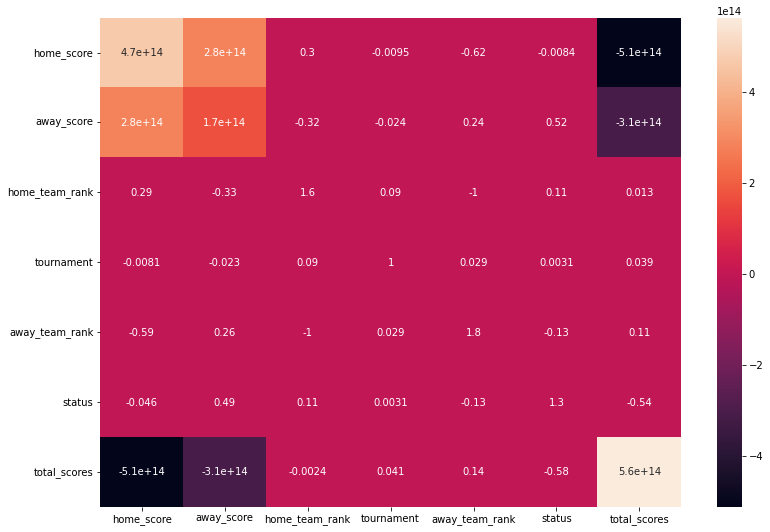

In [54]:
#plotting a heatmap to represent the VIF scores

plt.figure(figsize =(13,9))
sns.heatmap(vif, annot = True)


The VIF values of each variables can be seen diagonally. Total scores has the highest. Removing the total scores, we will test and record the changes

In [55]:
revised = independent_only.drop(columns=['total_scores'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,home_score,away_score,home_team_rank,tournament,away_team_rank,status
home_score,1.404306,-0.053867,0.297606,0.027596,-0.489709,-0.536412
away_score,-0.053867,1.132948,-0.322687,-0.001857,0.320278,0.197800
home_team_rank,0.297606,-0.322687,1.621955,0.089555,-1.022391,0.107491
tournament,0.027596,-0.001857,0.089555,1.012618,0.029116,0.003124
away_team_rank,-0.489709,0.320278,-1.022391,0.029116,1.776076,-0.132134
status,-0.536412,0.197800,0.107491,0.003124,-0.132134,1.325691


This indicates that total scores and rank are collinear. 

# 4.2.3 Model buidling using polynomial regression tools

Model One: : Predict how many goals the home team scores.

In [56]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [57]:
pred_df.head(3)

,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
0,1993-08-08,Bolivia,Uruguay,3,1,59,16,22,2,4
1,1993-08-08,Brazil,Mexico,1,1,8,17,14,0,2
2,1993-08-08,Ecuador,Venezuela,5,0,35,16,94,2,5


In [ ]:
pred_df.shape

(871, 10)

Creating training datasets from the home team, away team and rank datassets

In [82]:
pred_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'tournament', 'away_team_rank', 'status',
       'total_scores'],
      dtype='object')

In [83]:
#Getting our attributes and labels
X_home = np.array(pred_df[['home_team_rank','away_team_rank','tournament']])
y_home = pred_df['home_score']
print(X_home.shape)
print(y_home.shape)

(871, 3)
(871,)


In [93]:
# Fit Linear Regression model to the dataset so as to compare it with the polynomial regression
reg_lin_home = LinearRegression()
reg_lin_home.fit(X_home,y_home)

LinearRegression()

In [94]:
#Split the dataset into train and test sets.the data set will be split in an 80-20 ratio
X_home_train, X_home_test, y_home_train,y_home_test = train_test_split(X_home,y_home,test_size=0.2,random_state =0)

In [95]:
#viewing the shape of the data
y_home_train.shape

(696,)

In [96]:
# Fit polynomial Regression to the dataset
poly_reg_home = PolynomialFeatures(degree = 5) 
X_poly_home = poly_reg_home.fit_transform(X_home)

In [97]:
#Fitting the linear regression to our polynomial regression
reg_lin_home = LinearRegression()
reg_lin_home.fit(X_poly_home,y_home)

LinearRegression()

In [99]:
#Using home rank 12, away rank 5 and tournament 0(Friendly was the most common)
#Predicting using linear regression

lin_pred_home = reg_lin_home.predict([[12,5,0]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):" ,lin_pred_home)

#Predicting using Polynomial regression
poly_pred_home = reg_lin_home.predict(poly_reg_home.fit_transform([[12,5,0]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):" ,poly_pred_home)

Polynomial Prediction: 2
Polynomial Prediction (accurate): [2.99305407]


Challenging the prediction

In [102]:
pred_df.tail(4)

,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
867,2018-06-07,Uruguay,Uzbekistan,3,0,14,17,95,2,3
868,2018-06-07,Portugal,Algeria,3,0,4,17,66,2,3
869,2018-06-07,Iceland,Ghana,2,2,22,17,47,0,4
870,2018-06-07,India,New Zealand,1,2,97,21,120,1,3


In [104]:
#Using home rank 22, away rank 47 and tournament 2(Friendly was the most common)
#Ghana prediction
#Predicting using linear regression

lin_pred_home = reg_lin_home.predict([[22,47,2]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):" ,lin_pred_home)

#Predicting using Polynomial regression
poly_pred_home = reg_lin_home.predict(poly_reg_home.fit_transform([[22,47,2]]))
print("Polynomial Prediction: %d" %poly_pred_home)
print("Polynomial Prediction (accurate):" ,poly_pred_home)

Polynomial Prediction: 2
Polynomial Prediction (accurate): [2.45753473]


In [107]:
#Cross validating the model 1 using k-folds

from sklearn.model_selection import KFold
folds = KFold(n_splits = 5)


In [110]:
#Assessing the accuracy of the above model
#Importing the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
import sklearn.metrics as metrics


regressor_home = LinearRegression()
regressor_home.fit(X_home_train,y_home_train)
y_predict_home = regressor_home.predict(X_home_test)
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_home_test, y_predict_home)))

Root Mean Squared Error: 1.258948238663868


In [118]:
#Getting our attributes and labels
X_home = np.array(pred_df[['home_team_rank','away_team_rank','tournament']])
y_home = pred_df['home_score']


#Training and testing dataset
X_home_train, X_home_test, y_home_train,y_home_test = train_test_split(X_home,y_home,test_size=0.2,random_state =0)

In [120]:
#Create an array for each test

RMSES_home = []

#introducing a counter

count_home = 1

for train_index,test_index in folds.split(X_home):
  print("\nTraining model" + str(count_home))

  X_train,X_test = X.iloc[train_index], X.iloc[test_index]
  y_train,y_test = y[train_index], y[test_index]

#fiting in the regression model
reg_home = LinearRegression()
reg_home.fit(X_train,y_train)

#assessing the accuracy of the model
y_home_pred = reg_home.predict(X_test)


rmse_value_home =np.sqrt(metrics.mean_squared_error(y_home_test, y_predict_home))
RMSES_home.append(rmse_value_home)

print('Model' + str(count_home) + 'Root Mean Sqaured Error:' ,rmse_value_home )
count_home += 1


Training model1


NameError: ignored

In [ ]:
#The null hypothesis will be rejected should the test results be larger than the critical value

if (test_result_home > critical_value_home):
  print('The variance are homogenous, and the model needs to be reassessed.')
  else: 
    print('The variance are homogenous, The model passed the test.')

In [ ]:
#Average of RMSE mean

**Model 2: Predict how many goals the away team scores.**

In [122]:
#Getting our attributes and labels
X_away = np.array(pred_df[['home_team_rank','away_team_rank','tournament']])
y_away = pred_df['away_score']
print(X_away.shape)
print(y_away.shape)

(871, 3)
(871,)


In [123]:
# Fit Linear Regression model to the dataset so as to compare it with the polynomial regression
reg_lin_away = LinearRegression()
reg_lin_away.fit(X_away,y_away)

LinearRegression()

In [125]:
#Split the dataset into train and test sets.the data set will be split in an 80-20 ratio
X_away_train, X_away_test, y_away_train,y_away_test = train_test_split(X_away,y_away,test_size=0.2,random_state =0)

In [126]:
#viewing the shape of the data
y_away_train.shape

(696,)

In [127]:
# Fit polynomial Regression to the dataset
poly_reg_away = PolynomialFeatures(degree = 5) 
X_poly_away = poly_reg_away.fit_transform(X_away)

In [128]:
#Fitting the linear regression to our polynomial regression
reg_lin_away = LinearRegression()
reg_lin_away.fit(X_poly_away,y_away)

LinearRegression()

In [129]:
pred_df.head()

,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
0,1993-08-08,Bolivia,Uruguay,3,1,59,16,22,2,4
1,1993-08-08,Brazil,Mexico,1,1,8,17,14,0,2
2,1993-08-08,Ecuador,Venezuela,5,0,35,16,94,2,5
3,1993-08-08,Guinea,Sierra Leone,1,0,65,17,86,2,1
4,1993-08-08,Paraguay,Argentina,1,3,67,16,5,1,4


In [132]:
#Using home rank 12, away rank 5 and tournament 0(Friendly was the most common)-
#Predicting using linear regression

lin_pred_away = reg_lin_away.predict([[12,5,0]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):" ,lin_pred_away)

#Predicting using Polynomial regression
poly_pred_away = reg_lin_away.predict(poly_reg_away.fit_transform([[12,5,0]]))
print("Polynomial Prediction: %d" %poly_pred_away)
print("Polynomial Prediction (accurate):" ,poly_pred_away)

Polynomial Prediction: 3
Polynomial Prediction (accurate): [3.90273428]


Challenging the solution

In [133]:
pred_df.tail()

,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
866,2018-06-07,England,Costa Rica,2,0,12,17,23,2,2
867,2018-06-07,Uruguay,Uzbekistan,3,0,14,17,95,2,3
868,2018-06-07,Portugal,Algeria,3,0,4,17,66,2,3
869,2018-06-07,Iceland,Ghana,2,2,22,17,47,0,4
870,2018-06-07,India,New Zealand,1,2,97,21,120,1,3


In [135]:
#Using home rank 4, away rank 66 and tournament 17(Friendly was the most common)-Algeria
#Predicting using linear regression

lin_pred_away = reg_lin_away.predict([[4,66,17]])
print("Linear Prediction: %d" %lin_pred_home)
print("Linear Prediction (accurate):" ,lin_pred_away)

#Predicting using Polynomial regression
poly_pred_away = reg_lin_away.predict(poly_reg_away.fit_transform([[4,66,17]]))
print("Polynomial Prediction: %d" %poly_pred_away)
print("Polynomial Prediction (accurate):" ,poly_pred_away)

Polynomial Prediction: 0
Polynomial Prediction (accurate): [0.53933653]


In [136]:
#Cross validating the model 1 using k-folds

from sklearn.model_selection import KFold
folds = KFold(n_splits = 5)

In [137]:
#Assessing the accuracy of the above model
#Importing the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
import sklearn.metrics as metrics


regressor_away = LinearRegression()
regressor_away.fit(X_away_train,y_away_train)
y_predict_away = regressor_away.predict(X_away_test)
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_away_test, y_predict_away)))

Root Mean Squared Error: 1.330520074258781


In [138]:
#Getting our attributes and labels
X_away = np.array(pred_df[['home_team_rank','away_team_rank','tournament']])
y_away = pred_df['home_score']


#Training and testing dataset
X_away_train, X_away_test, y_way_train,y_away_test = train_test_split(X_home,y_away,test_size=0.2,random_state =0)

In [139]:
#Create an array for each test

RMSES_away = []

#introducing a counter

count_away = 1

for train_index,test_index in folds.split(X_away):
  print("\nTraining model" + str(count_away))

  X_train,X_test = X.iloc[train_index], X.iloc[test_index]
  y_train,y_test = y[train_index], y[test_index]

#fiting in the regression model
reg_home = LinearRegression()
reg_home.fit(X_train,y_train)

#assessing the accuracy of the model
y_away_pred = reg_away.predict(X_test)


rmse_value_away =np.sqrt(metrics.mean_squared_error(y_away_test, y_predict_away))
RMSES_home.append(rmse_value_home)

print('Model' + str(count_home) + 'Root Mean Sqaured Error:' ,rmse_value_away)
count_home += 1


Training model1


NameError: ignored

# 5.1 **Logistic Regression**

From the Home Team's perspective, if the result of a game determines if it is a win, loss or draw.

We will use the test training results from Polynomial regression.

We then use grid search to optimize the outcomes

In [145]:
pred_df.head(6)

,date,home_team,away_team,home_score,away_score,home_team_rank,tournament,away_team_rank,status,total_scores
0,1993-08-08,Bolivia,Uruguay,3,1,59,16,22,2,4
1,1993-08-08,Brazil,Mexico,1,1,8,17,14,0,2
2,1993-08-08,Ecuador,Venezuela,5,0,35,16,94,2,5
3,1993-08-08,Guinea,Sierra Leone,1,0,65,17,86,2,1
4,1993-08-08,Paraguay,Argentina,1,3,67,16,5,1,4
5,1993-08-08,Peru,Colombia,0,1,70,16,19,1,1


In [141]:
pred_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_team_rank', 'tournament', 'away_team_rank', 'status',
       'total_scores'],
      dtype='object')

In [146]:
#Dropping the columns we do not need
home_t = pred_df.drop(columns= ['date', 'home_team', 'away_team',
       'home_team_rank', 'tournament', 'away_team_rank',
       'total_scores'])
home_t.head(7)


,home_score,away_score,status
0,3,1,2
1,1,1,0
2,5,0,2
3,1,0,2
4,1,3,1
5,0,1,1
6,1,2,1


In [147]:
#We proceed to check for multicollinearlity between variables
# Let's display the correlations between the variables
correlations = home_t.corr()

correlations

,home_score,away_score,status
home_score,1.000000,-0.132413,0.458813
away_score,-0.132413,1.000000,-0.229481
status,0.458813,-0.229481,1.000000


In [148]:
#creating an inverse matrix
vif= pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

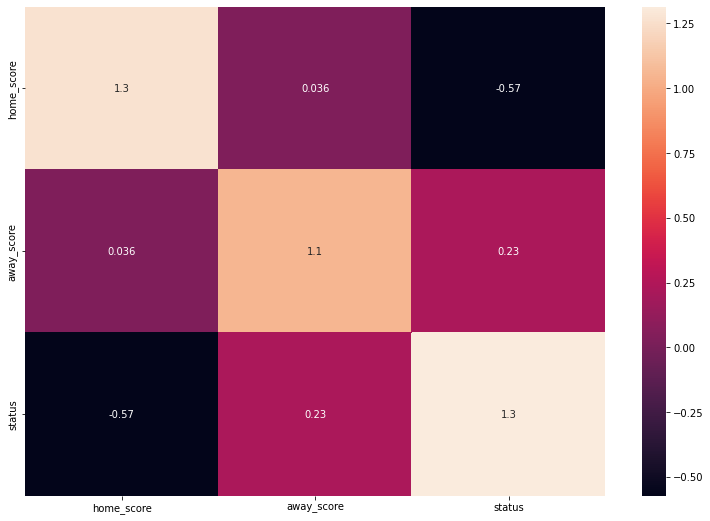

In [149]:
#plotting a heatmap to represent the VIF scores

plt.figure(figsize =(13,9))
sns.heatmap(vif, annot = True)

As per the heatmap, we see that the highest VIF scores are from the status column.We remove the status column to see the effect.

In [150]:
revised = home_t.drop(columns=['status'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score
home_score,1.017846,0.134776
away_score,0.134776,1.017846


As seen the VIF scores have changed suggesting that status and home team are collinear.

In [152]:
#Getting our attributes and labels
X_stat = np.array(pred_df[['home_score','away_score']])
y_stat = pred_df['status']
print(X_stat.shape)
print(y_stat.shape)

(871, 2)
(871,)


In [160]:
#Training and testing dataset
X_stat_train, X_stat_test, y_stat_train,y_stat_test = train_test_split(X_stat,y_stat,test_size=0.2,random_state =0)

In [161]:
#Fitting the model
import sklearn.linear_model as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_stat_train, y_stat_train)

LogisticRegression(solver='liblinear')

In [163]:
#Cross Validating the model
from sklearn.model_selection import cross_val_score
score = cross_val_score(LogisticRegression(solver = 'liblinear', multi_class = 'auto'),X_stat,y_stat, cv=3)
LogReg.fit(X_stat_train, y_stat_train)

LogisticRegression(solver='liblinear')

In [164]:
#Making a prediction using the abbove model
y_stat_pred = LogReg.predict(X_stat_test)
y_stat_pred

array([1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2,
       1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0,
       2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0,
       1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2])

In [165]:
#Conducting an analyis of the accuracy of the model
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std()* 2))

Accuracy: 0.99 (+/- 0.01)


As seen by the prediction, the model is accurate

In [166]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_stat_test, y_stat_pred)
confusion_matrix


array([[50,  0,  2],
       [ 0, 54,  0],
       [ 0,  0, 69]])

The leading diagonal has 50,54,69 meaning they were predicted in their classes. 

# 6. **Challenging the Solution**

The model from the polynomial regression may be subjected to more parameter tuning.
It is advisable that other models be used.6